Data Analysis

In [2]:
import pandas as pd

# Store data in a Dataframe
train = pd.read_csv("./raw_data/train.csv")
test = pd.read_csv("./raw_data/test.csv")
submission = pd.read_csv("./raw_data/sample_submission.csv")

In [3]:
test.describe()

,Unique ID,Rider_ID,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Humidity_%,Championship_Points,Championship_Position,year_x,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
count,5.468740e+05,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,...,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000,546874.000000
mean,1.365785e+06,5511.458782,4.702938,21.504193,11.502004,249.675333,59.511579,174.462350,12.553862,1997.940719,...,21.904386,29.741882,101.290290,87.464143,70.938874,13.945615,7.339466,1993.080638,2002.532225,9.374600
std,7.897079e+05,2596.594304,0.691855,2.291643,6.336072,57.764452,17.326322,101.008165,6.914408,17.100637,...,5.936310,11.640593,81.384252,69.774449,66.724584,25.988303,16.284865,16.842169,17.503189,5.141203
min,7.000000e+00,1000.000000,3.500000,18.000000,1.000000,150.000000,30.000000,0.000000,1.000000,1949.000000,...,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1949.000000,1949.000000,1.000000
25%,6.813645e+05,3267.000000,4.105000,20.000000,6.000000,199.290000,44.000000,87.000000,7.000000,1987.000000,...,17.000000,21.000000,35.000000,31.000000,17.000000,0.000000,0.000000,1983.000000,1991.000000,5.000000
50%,1.364578e+06,5514.000000,4.705000,22.000000,12.000000,249.630000,60.000000,174.000000,13.000000,2001.000000,...,21.000000,29.000000,85.000000,74.000000,53.000000,4.000000,1.000000,1996.000000,2007.000000,9.000000
75%,2.049822e+06,7762.000000,5.301000,24.000000,17.000000,299.600000,74.000000,262.000000,19.000000,2012.000000,...,26.000000,40.000000,146.000000,123.000000,106.000000,16.000000,7.000000,2006.000000,2019.000000,12.000000
max,2.734363e+06,9998.000000,5.900000,25.000000,22.000000,350.000000,89.000000,349.000000,24.000000,2021.000000,...,36.000000,54.000000,406.000000,373.000000,365.000000,178.000000,118.000000,2021.000000,2021.000000,26.000000


In [2]:
# Check for Nulls
pd.concat([
  train.isna().sum().rename("train_nulls"),
  test.isna().sum().rename("test_nulls")
], axis=1)

,train_nulls,test_nulls
Unique ID,0,0.0
Rider_ID,0,0.0
category_x,0,0.0
Circuit_Length_km,0,0.0
Laps,0,0.0
Grid_Position,0,0.0
Avg_Speed_kmh,0,0.0
Track_Condition,0,0.0
Humidity_%,0,0.0
Tire_Compound_Front,0,0.0


In [3]:
# Feature Operations
def add_features(df, is_train=False):
    # Ensure columns are numeric
    df["Avg_Speed_kmh"] = pd.to_numeric(df["Avg_Speed_kmh"], errors='coerce')
    df["Grid_Position"] = pd.to_numeric(df["Grid_Position"], errors='coerce')
    df["Ambient_Temperature_Celsius"] = pd.to_numeric(df["Ambient_Temperature_Celsius"], errors='coerce')
    df["Track_Temperature_Celsius"] = pd.to_numeric(df["Track_Temperature_Celsius"], errors='coerce')
    df["Humidity_%"] = pd.to_numeric(df["Humidity_%"], errors='coerce')
    df["finishes"] = pd.to_numeric(df["finishes"], errors='coerce')
    df["starts"] = pd.to_numeric(df["starts"], errors='coerce')
    df["podiums"] = pd.to_numeric(df["podiums"], errors='coerce')
    df["wins"] = pd.to_numeric(df["wins"], errors='coerce')

    if is_train:
        df["Lap_Time_Seconds"] = pd.to_numeric(df["Lap_Time_Seconds"], errors='coerce')
        df["Circuit_Length_km"] = pd.to_numeric(df["Circuit_Length_km"], errors='coerce')

    # Feature engineering logic
    df["Speed_vs_Grid"] = df["Avg_Speed_kmh"] / (df["Grid_Position"] + 1)
    df["Ambient_vs_Track_Temp"] = df["Ambient_Temperature_Celsius"] / (df["Track_Temperature_Celsius"] + 1)
    df["Humidity_Normalized"] = df["Humidity_%"] / 100
    df["Finish_Rate"] = df["finishes"] / (df["starts"] + 1)
    df["Podium_Rate"] = df["podiums"] / (df["starts"] + 1)
    df["Win_Rate"] = df["wins"] / (df["starts"] + 1)

    if is_train:
        df["Lap_Duration_per_km"] = df["Lap_Time_Seconds"] / (df["Circuit_Length_km"] + 1e-6)
        df["Speed_vs_Avg"] = df["Avg_Speed_kmh"] / (df["Lap_Time_Seconds"] + 1e-6)

    return df



train = add_features(train, is_train=True)
test = add_features(test, is_train=False)


In [4]:
print(train.columns)
print(len(train.columns))

Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%',
       'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track', 'air', 'ground', 'starts', 'finishes', 'with_points',
       'podiums', 'wins', 'min_year', 'max_year', 'years_active',
       'Speed_vs_Grid', 'Ambient_vs_Track_Temp', 'Humidity_Normalized',
       'Finish_Rate', 'Podium_Rate', 'Win_Rate', 'Lap_Duration_per_km',
       'Speed_vs_Avg'],
      dtype='object')
53


In [5]:
# Remove unnecesary features
cols_to_drop = [
    'Unique ID', 'Rider_ID', 'rider_name', 'team_name', 'shortname', 'circuit_name', 'sequence',
    'air', 'ground', 'track', 'weather',
    'starts', 'wins', 'podiums', 'finishes', 'with_points',
    'min_year', 'max_year',
    'rider', 'team', 'bike', 'bike_name'
]

train.drop(columns=cols_to_drop, errors='ignore', inplace=True)
test.drop(columns=cols_to_drop, errors='ignore', inplace=True)

print(len(train.columns))
print(len(test.columns))

31
28


In [6]:
from sklearn.preprocessing import LabelEncoder

# Drop high-cardinality columns from encoding
label_cols = ["Session", "weather", "Track_Condition", "category_x", "Tire_Compound_Front", "Tire_Compound_Rear"]

object_cols_train = train.select_dtypes(include='object').columns.tolist()
object_cols_test = test.select_dtypes(include='object').columns.tolist()

all_label_cols = list(set(label_cols).intersection(object_cols_train, object_cols_test))

for col in all_label_cols:
    le = LabelEncoder()
    combined_vals = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined_vals)
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))


In [7]:
# Train Data
X = train.drop(columns=["Lap_Time_Seconds"])
y = train["Lap_Time_Seconds"]

# Test data
X_test = test.copy()

# Align test data with train data based on columns
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

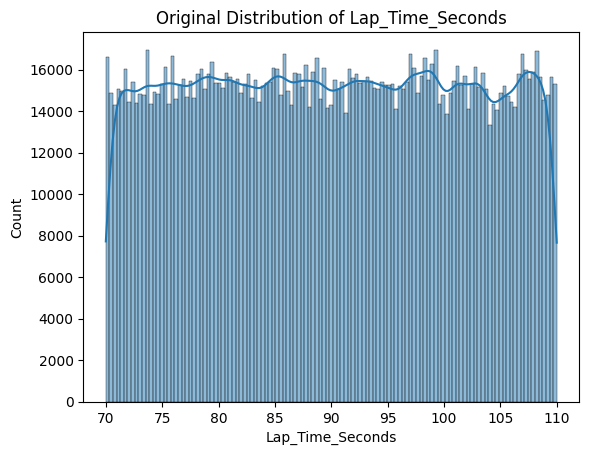

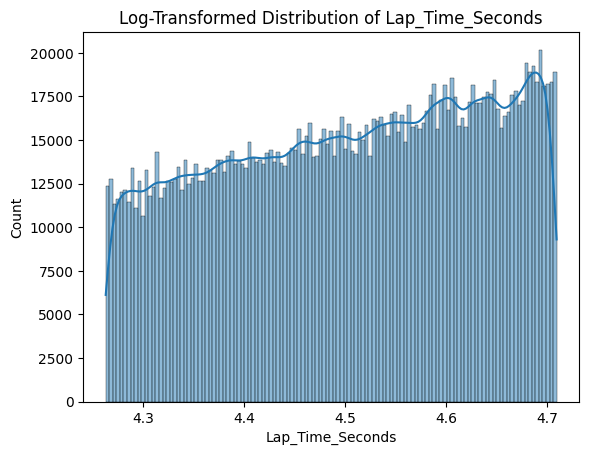

In [8]:
# Analyze Target Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.histplot(y, kde=True)
plt.title("Original Distribution of Lap_Time_Seconds")
plt.show()

sns.histplot(np.log1p(y), kde=True)
plt.title("Log-Transformed Distribution of Lap_Time_Seconds")
plt.show()


In [9]:
# Variance Analysis
(X.nunique() / len(X)).sort_values()

Track_Condition                    0.000001
category_x                         0.000002
Tire_Compound_Front                0.000002
Tire_Compound_Rear                 0.000002
Penalty                            0.000003
Session                            0.000004
Laps                               0.000004
Corners_per_Lap                    0.000008
Grid_Position                      0.000011
years_active                       0.000012
Championship_Position              0.000013
points                             0.000014
position                           0.000022
Tire_Degradation_Factor_per_Lap    0.000024
Humidity_%                         0.000031
Humidity_Normalized                0.000031
year_x                             0.000038
Ambient_Temperature_Celsius        0.000105
Win_Rate                           0.000141
Pit_Stop_Duration_Seconds          0.000157
Podium_Rate                        0.000177
Track_Temperature_Celsius          0.000183
Championship_Points             

In [10]:
# Label encode remaining columns of train
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        all_vals = pd.concat([X[col], X_test[col]], axis=0).astype(str)
        le.fit(all_vals)
        X[col] = le.transform(X[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))


Model Training

In [11]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor

# Load best model saved by FLAML
saved_model = joblib.load("./raw_data/flaml_best_model.pkl")
full_params = saved_model.get_params()

# Filter only valid parameters for ExtraTreesRegressor
valid_keys = ExtraTreesRegressor().get_params().keys()
best_params = {k: v for k, v in full_params.items() if k in valid_keys}

# Prepare KFold
kf = KFold(n_splits=2, shuffle=True, random_state=42)
rmse_scores = []
best_model = None
best_rmse = float("inf")

# Loop through folds
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = ExtraTreesRegressor(**best_params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores.append(rmse)

    print(f"Fold {fold} RMSE: {rmse:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model

# Summary
print("\nAll Fold RMSE Scores:", rmse_scores)
print(f"Best RMSE: {best_rmse:.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")

# Predict with best model
final_preds = best_model.predict(X_test)
submission["Lap_Time_Seconds"] = final_preds
submission.to_csv("submission.csv", index=False)
print("Submission file saved.")



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fold 1 RMSE: 0.0393
Fold 2 RMSE: 0.0394

All Fold RMSE Scores: [0.039270009874610406, 0.039440365791944175]
Best RMSE: 0.0393
Mean RMSE: 0.0394
Submission file saved.


In [12]:
# Feature Importance
importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": best_model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Display column names in order of importance
important_features = importance_df[importance_df["importance"] > 0]["feature"].tolist()
print(important_features)

['Lap_Duration_per_km', 'Circuit_Length_km', 'Speed_vs_Avg', 'Avg_Speed_kmh', 'Tire_Compound_Rear', 'Laps', 'points', 'Championship_Points', 'Track_Condition', 'category_x', 'Tire_Compound_Front', 'Grid_Position', 'Championship_Position', 'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius', 'position', 'Penalty', 'Session', 'Humidity_%', 'years_active', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap', 'year_x', 'Win_Rate', 'Finish_Rate', 'Track_Temperature_Celsius', 'Humidity_Normalized', 'Ambient_vs_Track_Temp', 'Podium_Rate', 'Speed_vs_Grid']
